In [1]:
import numpy as np
import pandas as pd

In [2]:
electric = pd.read_csv("E:/P-Python/model.csv",encoding = "gb18030")

In [3]:
electric.head()

,时间,用户编号,电量趋势增长指标,线损指标,告警类指标,是否窃漏电
0,2014年9月6日,9900667154,4,1,1,1
1,2014年9月20日,9900639431,4,0,4,1
2,2014年9月17日,9900585516,2,1,1,1
3,2014年9月14日,9900531154,9,0,0,0
4,2014年9月17日,9900491050,3,1,0,0


In [4]:
electric.shape

(291, 6)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = electric.iloc[:,0:5]

In [7]:
x.head()

,时间,用户编号,电量趋势增长指标,线损指标,告警类指标
0,2014年9月6日,9900667154,4,1,1
1,2014年9月20日,9900639431,4,0,4
2,2014年9月17日,9900585516,2,1,1
3,2014年9月14日,9900531154,9,0,0
4,2014年9月17日,9900491050,3,1,0


In [45]:
y = electric.iloc[:,5]

In [46]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: 是否窃漏电, dtype: int64

# 1、划分测试集训练集

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 1234 )

In [48]:
x_train.shape

(232, 5)

In [49]:
x_test.head()

,时间,用户编号,电量趋势增长指标,线损指标,告警类指标
40,2014年9月23日,6310100375,4,0,0
100,2014年9月17日,6310100375,0,0,2
137,2014年9月6日,8310100766,2,0,0
232,2014年9月23日,7346433666,4,0,2
221,2014年9月18日,9487039658,1,0,2


# 2、构建随机森林模型

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
RFC = RandomForestClassifier(max_features=0.7,n_estimators=300)

In [111]:
RFC.fit(x_train.iloc[:,2:],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [112]:
y_pred = RFC.predict(x_test.iloc[:,2:])

In [113]:
pd.value_counts(y_pred)

0    50
1     9
dtype: int64

# 3、模型评价

In [115]:
from sklearn.metrics import accuracy_score  #准确度89%
accuracy_score(y_test,y_pred)

0.9152542372881356

In [105]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[49  2]
 [ 2  6]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        51
          1       0.75      0.75      0.75         8

avg / total       0.93      0.93      0.93        59



In [107]:
proba = RFC.predict_proba(x_test.iloc[:,2:])[:,1] #预测概率值

In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,proba)                 #查看AUC的值，注意的地方AUC的参数是预测的概率值

0.95465686274509809

In [109]:
from sklearn.metrics import roc_curve

In [99]:
fpr,tpr,thresholds = roc_curve(y_test,proba,pos_label=1) #构建ROC曲线图，pos_label=1表示正类的类别标记 = 1

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

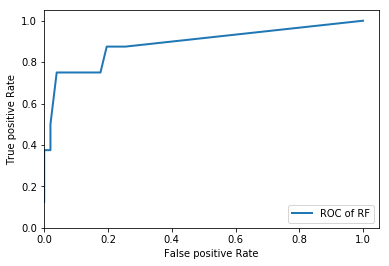

In [63]:
plt.plot(fpr,tpr,linewidth = 2,label ="ROC of RF")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc =4) #图例及位置

网格搜索为自动化调参的常见技术之一。grid_search包提供了提供了自动化调参的工具，包括GridSearchCV类，GridSearchCV根据给定的模型自动进行交叉验证，通过调节每一个参数来跟踪评分结果，实际上代替了参数搜索的for循环过程。适用于参数是离散取值的情况下。若参数是连续取值采取随机搜索寻求RandomizedSearchCV。

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid ={"max_features" :[.1, .3, .5, .7, .9, .99],"n_estimators":[100,200,300]}

In [118]:
rfc = RandomForestClassifier()

In [119]:
gscv = GridSearchCV(rfc,param_grid,n_jobs= -1,verbose = 1,cv = 5,error_score = 0,scoring="roc_auc")   

In [124]:
#gscv.fit(x_train.iloc[:,2:],y_train) #训练

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.4s finished


GridSearchCV(cv=5, error_score=0,
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 0.99], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [125]:
#gscv.grid_scores_

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.90228, std: 0.08078, params: {'max_features': 0.1, 'n_estimators': 100},
 mean: 0.90992, std: 0.07059, params: {'max_features': 0.1, 'n_estimators': 200},
 mean: 0.90987, std: 0.07468, params: {'max_features': 0.1, 'n_estimators': 300},
 mean: 0.89339, std: 0.09440, params: {'max_features': 0.3, 'n_estimators': 100},
 mean: 0.89975, std: 0.09331, params: {'max_features': 0.3, 'n_estimators': 200},
 mean: 0.90285, std: 0.09296, params: {'max_features': 0.3, 'n_estimators': 300},
 mean: 0.91762, std: 0.06946, params: {'max_features': 0.5, 'n_estimators': 100},
 mean: 0.91880, std: 0.06507, params: {'max_features': 0.5, 'n_estimators': 200},
 mean: 0.90228, std: 0.08181, params: {'max_features': 0.5, 'n_estimators': 300},
 mean: 0.90124, std: 0.07916, params: {'max_features': 0.7, 'n_estimators': 100},
 mean: 0.89422, std: 0.09455, params: {'max_features': 0.7, 'n_estimators': 200},
 mean: 0.89856, std: 0.08216, params: {'max_features': 0.7, 'n_estimators': 300},
 mean: 0.90331, 

In [126]:
#gscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [127]:
#gscv_pred = gscv.predict(x_test.iloc[:,2:])  

# 4、CART决策树模型

In [64]:
from sklearn.tree import DecisionTreeClassifier #导入决策树的库

In [65]:
CLF = DecisionTreeClassifier()

In [66]:
CLF.fit(x_train.iloc[:,2:],y_train) #模型训练

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [67]:
tree_pred = CLF.predict(x_test.iloc[:,2:])

In [68]:
pd.value_counts(tree_pred)

0    50
1     9
dtype: int64

# 5、CART决策树模型评价

In [69]:
from sklearn.metrics import accuracy_score  #准确度93%
accuracy_score(y_test,tree_pred)

0.9152542372881356

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tree_pred))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        51
          1       0.67      0.75      0.71         8

avg / total       0.92      0.92      0.92        59



In [71]:
from sklearn.metrics import roc_auc_score
tree_proba = CLF.predict_proba(x_test.iloc[:,2:])[:,1] #预测概率值
roc_auc_score(y_test,tree_proba)                 #查看AUC的值，注意的地方AUC的参数是预测的概率值

0.83333333333333337

In [72]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,proba,pos_label=1) #构建ROC曲线图，pos_label=1表示正类的类别标记 = 1

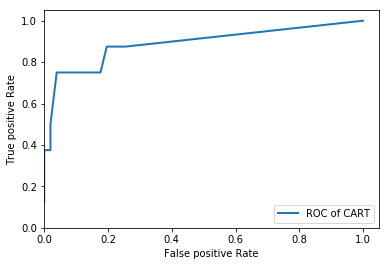

In [73]:
plt.plot(fpr,tpr,linewidth = 2,label ="ROC of CART")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc =4) #图例及位置